In [ ]:
 from google.colab import files, drive
drive.mount("/content/gdrive")
 
%cd "/content/gdrive/My Drive"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [ ]:
 from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img, ImageDataGenerator

In [ ]:
train_dir = r"/content/gdrive/My Drive/Deep Learning/Datasets/dogs_vs_cats/train/train/"
valid_dir = r"/content/gdrive/My Drive/Deep Learning/Datasets/dogs_vs_cats/train/valid/"

In [ ]:
#os.listdir(train_dir)

# ImageDataGenerator
has different argumentation parameters to augment our data. So u can check them online or do shift tab.

In [ ]:
train_gen = ImageDataGenerator(rescale = 1/255,
rotation_range = 30, width_shift_range= 0.2,
height_shift_range=0.2, zoom_range =0.2, horizontal_flip = True, fill_mode= 'nearest')
 
valid_gen = ImageDataGenerator(rescale = 1/255,
rotation_range = 30, width_shift_range= 0.2,
height_shift_range=0.2, zoom_range =0.2, horizontal_flip = True, fill_mode= 'nearest')

In [ ]:
train_datagen= train_gen.flow_from_directory(train_dir, target_size = (224,224), batch_size=32, class_mode='binary')
valid_datagen= valid_gen.flow_from_directory(valid_dir, target_size =(224,224),  batch_size=32, class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# Model
on Argumemts

In [ ]:
 from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
 model = Sequential()
 
model.add(Conv2D(filters = 32,kernel_size=[2,2], padding = 'same',
                 input_shape=(224,224, 3),  activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters = 64,kernel_size=[2,2], padding = 'same',
                 input_shape=(224,224, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters = 72,kernel_size=[5,5], padding = 'same',
                 input_shape=(224,224, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters = 96,kernel_size=[7,7], padding = 'same',
                 input_shape=(224,224, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Flatten())
 
model.add(Dense(units=128, activation='relu', input_shape=(100,100,3)))
model.add(Dropout(0.4))
 
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
 
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics =['accuracy'])
 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 64)      8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 72)        115272    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 72)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 96)       

In [ ]:
 early_stop = EarlyStopping(monitor='val_loss', mode = "min",
                           patience=2)
 
checkpoint = ModelCheckpoint(filepath="weights.{epoch:02d}-{val_loss:.2f}.hdf5",
                             monitor='val_loss', mode = "min", save_best_only=True)

In [ ]:
%%time
 
model.fit_generator(generator=train_datagen,
validation_data=valid_datagen, epochs=10,
callbacks= [early_stop, checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
32/32 [==============================] - 276s 9s/step - loss: 0.6957 - accuracy: 0.5210 - val_loss: 0.6840 - val_accuracy: 0.5100
Epoch 2/10
32/32 [==============================] - 17s 519ms/step - loss: 0.6883 - accuracy: 0.5490 - val_loss: 0.6681 - val_accuracy: 0.6000
Epoch 3/10
32/32 [==============================] - 17s 518ms/step - loss: 0.6919 - accuracy: 0.5450 - val_loss: 0.6921 - val_accuracy: 0.5050
Epoch 4/10
32/32 [==============================] - 17s 516ms/step - loss: 0.6866 - accuracy: 0.5500 - val_loss: 0.6653 - val_accuracy: 0.6300
Epoch 5/10
32/32 [==============================] - 16s 515ms/step - loss: 0.6720 - accuracy: 0.5790 - val_loss: 0.6439 - val_accuracy: 0.6200
Epoch 6/10
32/32 [==============================] - 17s 522ms/step - loss: 0.6605 - accuracy: 0.6230 - val_loss: 0.6345 - val_accuracy: 0.6250
Epoch 7/10
32/32 [==============================] - 17s 517ms/step -

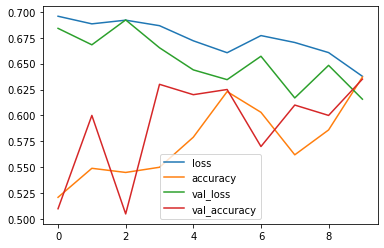

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

Accuracy...


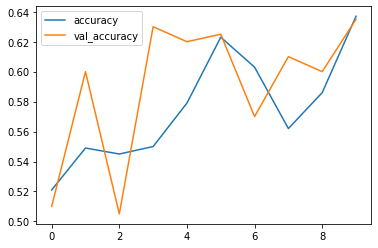

In [ ]:
 print("Accuracy...")
losses[['accuracy', 'val_accuracy']].plot()